## Search AME2016 database
## Import AME database as pandas dataframe

In [1]:
import numpy as np
import pandas as pd
import fortranformat as ff
import matplotlib as plt
import mpmath as mp
%matplotlib inline

#AME = pd.read_table('ame16.txt',skiprows=37,delim_whitespace=True,error_bad_lines=False)
#AME

df = pd.read_csv('ame16.txt',sep="\t",skiprows=38)
#df

## Create AME dataframe in appropriate formatting

In [15]:
arr_AME = []
line = ff.FortranRecordReader('a1,A3,A5,A5,A5,1x,A3,A4,1x,A13,A11,A11,A9,1x,A2,A11,A9,1x,A3,1x,A12,A12')
for i in range(len(df)):
    row = line.read(str(df.iloc[i].values[0])) 
    #print(i, [row])
    arr_AME += [row]
    #nucl = record._make(line.read(line))
arr_AME = np.array(arr_AME) 

df_AME = pd.DataFrame(arr_AME)
df_AME.columns = columns=['0','N-Z','N','Z','A','Element','O','ME [keV]','Error ME [keV]','BINDING ENERGY/A [keV]','Error BINDING ENERGY/A [keV]','Decay type','BETA-DECAY ENERGY [keV]','Error BETA-DECAY ENERGY [keV]','Mass_int','ATOMIC MASS [µu]','Error ATOMIC MASS [µu]']
# remove unnecessary columns
df_AME.drop(['0'],axis=1,inplace=True) 
df_AME.drop('Decay type', axis=1, inplace=True)
df_AME.drop('BETA-DECAY ENERGY [keV]', axis=1, inplace=True)
df_AME.drop('Error BETA-DECAY ENERGY [keV]', axis=1, inplace=True)
mask = df_AME['ME [keV]'].str.contains('#') # series containing 'True' if mass excess value has a '#'
df_AME['Extrapolated?'] = mask

# Format column data
df_AME.A = df_AME.A.astype(int)
df_AME['N-Z'] = df_AME['N-Z'].astype(int)
df_AME.N = df_AME.N.astype(int)
df_AME.Z = df_AME.Z.astype(int)
df_AME['Element'] = df_AME['Element'].str.strip()

# Remove '#'s from mass data and change data types to float
df_AME['ME [keV]'] = df_AME['ME [keV]'].str.replace('#', '').astype(float)
df_AME['Error ME [keV]'] = df_AME['Error ME [keV]'].str.replace('#', '').astype(float)
df_AME['BINDING ENERGY/A [keV]'] = df_AME['BINDING ENERGY/A [keV]'].str.replace('#', '').astype(float)
df_AME['Error BINDING ENERGY/A [keV]'] = df_AME['Error BINDING ENERGY/A [keV]'].str.replace('#', '').astype(float)
df_AME['ATOMIC MASS [µu]'] = df_AME['ATOMIC MASS [µu]'].str.replace('#', '').astype(np.float64) 
df_AME['Mass_int'] = df_AME['Mass_int'].astype(int) 
df_AME['ATOMIC MASS [µu]'] = df_AME['ATOMIC MASS [µu]'] + df_AME['Mass_int']*1e06   # calculate full mass value
df_AME.drop(['Mass_int'],axis=1,inplace=True) 
df_AME['Error ATOMIC MASS [µu]'] = df_AME['Error ATOMIC MASS [µu]'].str.replace('#', '').astype(float)


df_AME.set_index(['A'],inplace=True) # set mass number as index
# Output dataframe to .csv
#df_AME.to_csv('AME2016.csv',float_format='%.5f')

df_AME

,N-Z,N,Z,Element,O,ME [keV],Error ME [keV],BINDING ENERGY/A [keV],Error BINDING ENERGY/A [keV],ATOMIC MASS [µu],Error ATOMIC MASS [µu],Extrapolated?
A,,,,,,,,,,,,
1,1,1,0,n,,8071.31713,0.00046,0.000,0.000,1.008665e+06,0.00049,False
1,-1,0,1,H,,7288.97061,0.00009,0.000,0.000,1.007825e+06,0.00009,False
2,0,1,1,H,,13135.72176,0.00011,1112.283,0.000,2.014102e+06,0.00012,False
3,1,2,1,H,,14949.80993,0.00022,2827.265,0.000,3.016049e+06,0.00023,False
3,-1,1,2,He,,14931.21793,0.00021,2572.680,0.000,3.016029e+06,0.00022,False
3,-3,0,3,Li,-pp,28667.00000,2000.00000,-2267.000,667.000,3.030775e+06,2147.00000,True
4,2,3,1,H,-n,24621.12700,100.00000,1720.449,25.000,4.026432e+06,107.35400,False
4,0,2,2,He,,2424.91561,0.00006,7073.915,0.000,4.002603e+06,0.00006,False
4,-2,1,3,Li,-p,25323.18900,212.13200,1153.760,53.033,4.027186e+06,227.73300,False


[38 39 40 41 42 43 44 45 46 47 48 49 50 51 52] [-34790.    -46053.    -58549.987 -66203.357 -76134.528 -79776.223
 -86323.223 -86362.627 -89907.527 -86942.383 -87132.138 -80608.134
 -77353.687 -66473.292 -58219.748]


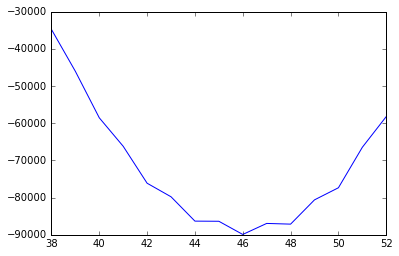

In [19]:
A_106 = df_AME.loc[106]
x = A_106['Z'].values
y = A_106['ME [keV]'].values 
print(x,y)
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show()

## Example usage for MR TOF data analysis

In [49]:
df_AME['ATOMIC MASS [µu]'].loc['In' ,106]*1e-06

106.913463603

In [50]:
# Import AME dataframe
df_AME = pd.read_csv("C:/Users/Stefan/Dropbox/Beam time analysis/AME2016/AME2016_formatted.csv",encoding = 'unicode_escape')
df_AME.set_index(['Element','A'],inplace=True)


def mdata_AME(El,A):
    """ Gives atomic mass from AME2016 [u] """
    if El = ':':
        m_AME = df_AME['ATOMIC MASS [µu]'].loc[(El,A)]*1e-06
        m_AME_error = df_AME['Error ATOMIC MASS [µu]'].loc[(El,A)]*1e-06
        extrapolated_yn = df_AME['Extrapolated?'].loc[(El,A)]
        return [El,A,m_AME,m_AME_error,extrapolated_yn]
    else:
        m_AME = df_AME['ATOMIC MASS [µu]'].loc[(El,A)]*1e-06
        m_AME_error = df_AME['Error ATOMIC MASS [µu]'].loc[(El,A)]*1e-06
        extrapolated_yn = df_AME['Extrapolated?'].loc[(El,A)]
        return [El,A,m_AME,m_AME_error,extrapolated_yn]
    
print(mdata_AME('Sr',106))

 m_AME = df_AME['ATOMIC MASS [µu]'].loc[(,A)]*1e-06

SyntaxError: invalid syntax (<ipython-input-50-6ff278abfcb9>, line 8)

In [ ]:
"""
for item in df_AME['ME [keV]'].iteritems():
    i_row = item[0]
    print(i_row)
    string = item[1].strip()
    if string[-1] == '#': # remove '#' indicators from mass values and make value float
        #print(item[1].strip()[:-1])
        #print(item)
        new_value = string.replace('#','')
        df_AME['ME [keV]'].iloc[i_row] = new_value
        #print(df_AME.iloc[item[0]])
    #else:
        #df_AME['ME [keV]'].iloc[i_row] = string
        #print('n')

#df_AME['ME [keV]']  = df_AME['ME [keV]'].str.strip()        
df_AME['ME [keV]'] =  df_AME['ME [keV]'].astype(float)
#df_AME['ME [keV]'] = np.where(df_AME['ME [keV]'][1].find('28667# '), 'extrapolated', df_AME['ME [keV]'][1])
#df_AME
"""


"""
for item in df_AME['ME [keV]'].iteritems():
    i_row = item[0]
    string = item[1].strip()
    if string[-1] == '#': # remove '#' indicators from mass values and make value float
        #print(item[1].strip()[:-1])
        #print(item)
        new_value = string.replace('#','')
        df_AME['ME [keV]'].iloc[i_row] = new_value
        #print(df_AME.iloc[item[0]])
    else:
        a = 1
        #print('n')
     
# creating a filter for age column  
# where age = "Twenty five"  
filter_ame = filter(df_AME['ME [keV]'][1].strip()[-1] == "#")
print(df_AME.where(filter_ame))
        

#.str.replace('\d+', '')


df_AME['ME [keV]'] = df_AME['ME [keV]'].astype(float,raise_on_error=False) # skip columns with # at end of value
df_AME['Mass number'] = df_AME['Mass number'].astype(int)

df_AME.set_index(['A'],inplace=True) # set mass number as index
df_AME"""

## Former formatting 

In [423]:
arr_AME = []
line = ff.FortranRecordReader('a1,A3,A5,A5,A5,1x,A3,A4,1x,A13,A11,A11,A9,1x,A2,A11,A9,A17,A12')
for i in range(len(df)):         #len(df)):
    row = line.read(str(df.iloc[i].values[0])) 
    #print(i, [row])
    arr_AME += [row]
    #nucl = record._make(line.read(line))
arr_AME = np.array(arr_AME) 
df_AME = pd.DataFrame(arr_AME)
df_AME.columns = columns=['0','N-Z','N','Z','A','Element','O','ME [keV]','Error ME [keV]','BINDING ENERGY/A [keV]','Error BINDING ENERGY/A [keV]','Decay type','BETA-DECAY ENERGY [keV]','Error BETA-DECAY ENERGY [keV]','ATOMIC MASS [µu]','Error ATOMIC MASS [µu]']
df_AME.drop(['0'],axis=1,inplace=True) # remove unnecessary columns
df_AME.A = df_AME.A.astype(int)
#df_AME.N-Z = df_AME.N-Z.astype(int)
df_AME.N = df_AME.N.astype(int)
df_AME.Z = df_AME.Z.astype(int)

df_AME.set_index(['A'],inplace=True) # set mass number as index
df_AME

,N-Z,N,Z,Element,O,ME [keV],Error ME [keV],BINDING ENERGY/A [keV],Error BINDING ENERGY/A [keV],Decay type,BETA-DECAY ENERGY [keV],Error BETA-DECAY ENERGY [keV],ATOMIC MASS [µu],Error ATOMIC MASS [µu]
A,,,,,,,,,,,,,,
1,1,1,0,n,,8071.31713,0.00046,0.0,0.0,B-,782.347,0.000,1 008664.91582,0.00049
1,-1,0,1,H,,7288.97061,0.00009,0.0,0.0,B-,*,,1 007825.03224,0.00009
2,0,1,1,H,,13135.72176,0.00011,1112.283,0.000,B-,*,,2 014101.77811,0.00012
3,1,2,1,H,,14949.80993,0.00022,2827.265,0.000,B-,18.592,0.000,3 016049.28199,0.00023
3,-1,1,2,He,,14931.21793,0.00021,2572.680,0.000,B-,-13736#,2000#,3 016029.32265,0.00022
3,-3,0,3,Li,-pp,28667#,2000#,-2267#,667#,B-,*,,3 030775#,2147#
4,2,3,1,H,-n,24621.127,100.000,1720.449,25.000,B-,22196.211,100.000,4 026431.868,107.354
4,0,2,2,He,,2424.91561,0.00006,7073.915,0.000,B-,-22898.273,212.132,4 002603.25413,0.00006
4,-2,1,3,Li,-p,25323.189,212.132,1153.760,53.033,B-,*,,4 027185.562,227.733
